In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pairs(n):
    vec = np.random.permutation(np.arange(n))
    return vec[0:n // 2], vec[n // 2:]

In [3]:
def kinetic_exchange(v, w):
    r = 2 * (np.random.rand(v.size) - 0.5)
    return v + (r * np.minimum(v, w)), w - (r * np.minimum(v, w))

In [4]:
def gini(w):
    N = w.size
    sum1 = np.sum((np.arange(N) + 1) * np.sort(w))
    sum2 = N * np.sum(w)
    return 2 * (sum1 / sum2) - (1 + (1 / N))

In [5]:
def sim(population_size, capital_return):
    sim_length = 20

    wealths = np.ones(population_size)
    incomes = np.random.rand(population_size)

    for i in range(sim_length):

        p1, p2 = pairs(population_size)
        wealths[p1], wealths[p2] = kinetic_exchange(wealths[p1], wealths[p2])

        wealths += incomes

        wealths += np.maximum((wealths - 1) * capital_return, np.zeros(population_size))
        wealths *= (population_size / np.sum(wealths))

    return gini(wealths)

In [6]:
capital_returns = np.arange(0, 1, 0.01)
ginis = np.array(list(map(lambda x : [sim(100000, x) for _ in range(50)], capital_returns)))
yvals = np.array(list(map(lambda x: np.mean(x), ginis)))
yerror = np.array(list(map(lambda x: np.std(x) / np.sqrt(x.size), ginis))) #error approx. 0.0005 for all capital returns

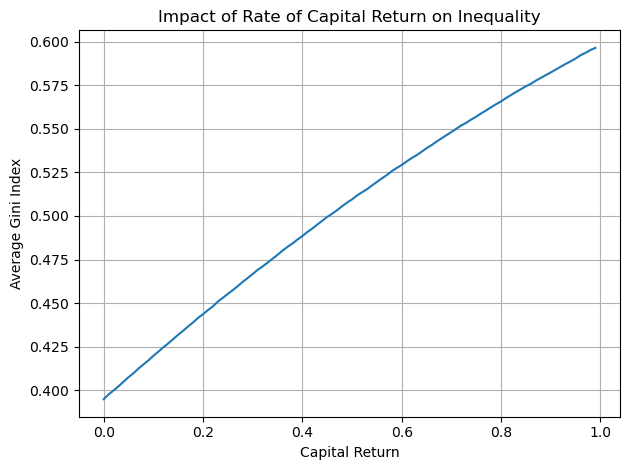

In [10]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
plt.plot(capital_returns, yvals)
plt.grid(True)
ax.set_xlabel('Capital Return')
ax.set_ylabel('Average Gini Index')
ax.set_title('Impact of Rate of Capital Return on Inequality')
plt.savefig('plots/capital_return.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [8]:
print(f'Mean error {np.mean(yerror)} \nMin error: {np.min(yerror)} \nMax error: {np.max(yerror)}')

Mean error 0.00011719649127840326 
Min error: 8.326003423168095e-05 
Max error: 0.00014843451640431302
